In [102]:
#import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


#基本的なコード
#フォントサイズの変更
plt.rcParams["font.size"] = 28
plt.rcParams['font.family'] = "IPAexGothic"

In [103]:
# csvの読み込み
# ヘッダなしの場合csv = pd.read_csv("ファイル名(.csv)", header=None, names=['user_id', 'name'])で可能
fname = "../data/3回目/"
acc = pd.read_csv(fname+"acc.csv",encoding = 'utf-8')
ans = pd.read_csv(fname+"ans.csv",encoding = 'utf-8')

1687342834771


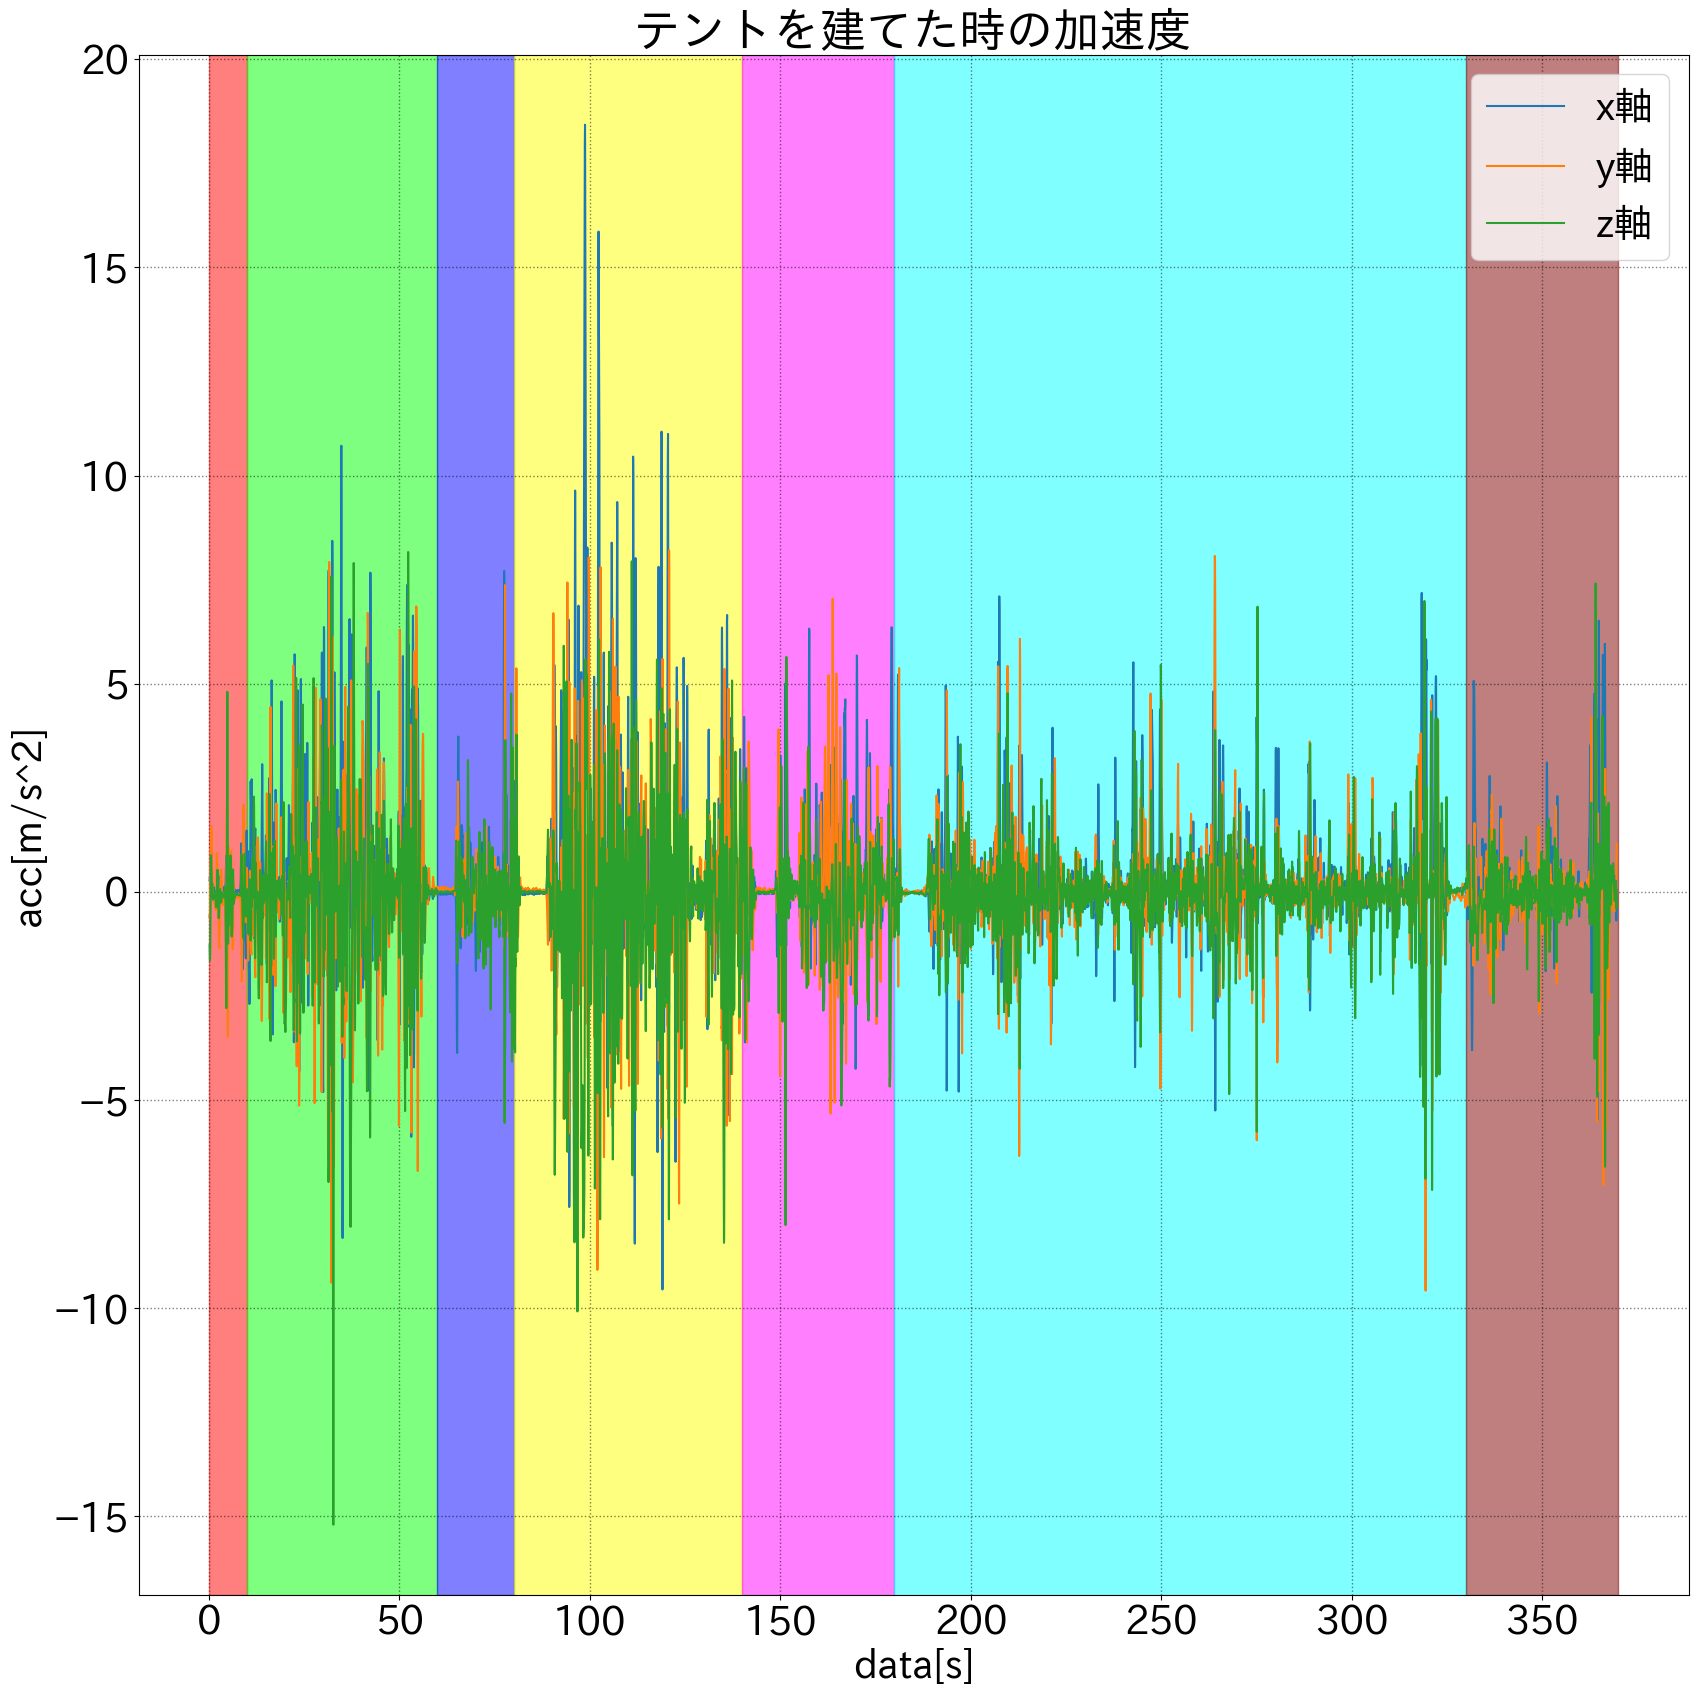

In [104]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("テントを建てた時の加速度")
## x軸のラベル
ax3.set_xlabel('data[s]')
## y軸のラベル
ax3.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作
## ノイズ除去
ax3.plot((acc["time"]-acc["time"][0])/1000, acc["x"].rolling(window=5).mean(), label="x軸")
ax3.plot((acc["time"]-acc["time"][0])/1000, acc["y"].rolling(window=5).mean(), label="y軸")
ax3.plot((acc["time"]-acc["time"][0])/1000, acc["z"].rolling(window=5).mean(), label="z軸")

ax3.legend()

# 8種類の色を指定
colors = ["#000000", "#ff0000", "#00ff00", "#0000ff", "#ffff00", "#ff00ff", "#00ffff", "#800000", "#008000"]

print(ans["time"][0])

#　階段利用区間をラベリング
for i in range(1,len(ans)):
    ax3.axvspan((ans["time"][i-1]-ans["time"][0])/1000, (ans["time"][i]-ans["time"][0])/1000, color=colors[i], alpha=0.5, zorder=1)

In [105]:
# 新しい配列を作成
new_data = []
nowTime = 0

# 時間の間隔を考慮しながらデータをサンプリング
for i in range(len(acc) - 1):
    if int(acc["time"][i]) - nowTime >= 1000:
        new_data.append([acc["time"][i], acc["x"][i], acc["y"][i], acc["z"][i]])
        nowTime = acc["time"][i]

# 新しい配列を表示
for row in new_data:
    print(row)

[1687342840384, 0.10447264, -0.42274714, -0.5270424]
[1687342841395, -0.004260063, -0.15701103, -0.27733672]
[1687342842410, -0.26627445, 1.0349661, 0.06785536]
[1687342843421, -0.10508728, 0.55072117, -0.24685419]
[1687342844435, 0.092134476, -0.025714874, -0.15367568]
[1687342845447, -1.0955658, 2.4048789, -1.117615]
[1687342846460, 0.3669529, -0.8500018, -0.98378754]
[1687342847473, -0.014183044, -0.13559794, -0.046197534]
[1687342848487, 0.03547764, -0.0864017, -0.08775604]
[1687342849498, 0.26803207, 1.8773407, -0.21621752]
[1687342850512, 0.7776003, -1.2995532, -0.55459046]
[1687342851525, 2.4852514, -1.055908, 0.9912092]
[1687342852550, 0.9923763, -1.8937275, 1.1672515]
[1687342853550, -0.43941402, 0.8025812, -0.95215195]
[1687342854563, -0.8833122, -0.58759046, 1.7688485]
[1687342855579, -0.27230597, -0.17772532, -2.4427457]
[1687342856588, -1.5378838, -0.14585066, -3.952475]
[1687342857601, -2.085915, 0.33220506, 0.28852797]
[1687342858614, -0.4685135, -0.9369974, 0.1915046]
[

In [120]:
### FFT: tの関数をfの関数にする ###
noiseRemoveAccX = np.array(new_data)[0:,1]
N = len(noiseRemoveAccX) # データ数
dt = 1



y_fft = np.fft.fft(noiseRemoveAccX) # 離散フーリエ変換
freq = np.fft.fftfreq(N, d=dt) # 周波数を割り当てる（※後述）
Amp = abs(y_fft/(N/2)) # 音の大きさ（振幅の大きさ）

print(noiseRemoveAccX)
# print(y_fft)
# print(freq)
# print(Amp)
# print(len(freq))
# print(len(Amp))
# print(N)

[ 1.04472640e-01 -4.26006300e-03 -2.66274450e-01 -1.05087280e-01
  9.21344760e-02 -1.09556580e+00  3.66952900e-01 -1.41830440e-02
  3.54776400e-02  2.68032070e-01  7.77600300e-01  2.48525140e+00
  9.92376300e-01 -4.39414020e-01 -8.83312200e-01 -2.72305970e-01
 -1.53788380e+00 -2.08591500e+00 -4.68513500e-01 -5.05342500e-02
  3.19093000e-01 -1.01360130e+00 -1.36326620e+00  3.86618470e+00
 -2.43492200e+00 -1.66091440e+00 -1.71170230e-01  3.26122380e+00
  2.17606760e+00  1.92791270e+00 -9.45725440e-02  9.91977300e+00
  4.11621950e+00 -1.53133610e+00  7.45954500e-01  2.85495140e+00
  1.50972800e+00  6.13311340e+00 -4.26971900e-01  6.73876300e-01
  1.21142960e+00  1.33678250e+00  2.17530540e+00 -7.06663100e-02
  2.34529500e+00  6.14310740e-01  9.61669700e-01 -1.36577400e-01
 -7.73912670e-01  7.93104400e-01  9.26746370e-01  1.81122040e+00
  5.05573560e+00 -3.24672800e+00  3.74370900e+00  1.04454040e+00
 -6.16722100e-02 -1.53038980e-01 -1.17831230e-01 -6.19974140e-02
 -4.43401340e-02 -5.02433

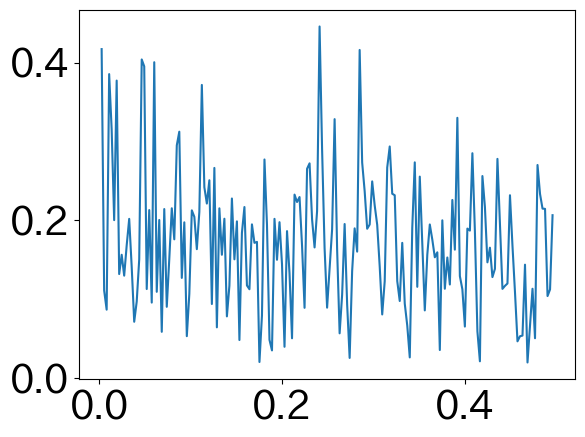

In [121]:
### 音波のスペクトル ###
plt.plot(freq[1:int(N/2)], Amp[1:int(N/2)]) # A-f グラフのプロット
# plt.xscale("log") # 横軸を対数軸にセット
plt.show()